In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
ruta = "..\ds_blend_students_2020\DESAFIO\properati.csv"

data = pd.read_csv(ruta, sep=",")

In [3]:
# nulos de superficie
data[["surface_total_in_m2","surface_covered_in_m2"]].isnull().sum()/data.shape[0]*100

surface_total_in_m2      32.443491
surface_covered_in_m2    16.422208
dtype: float64

In [4]:
pd.set_option("display.max_colwidth", None)
pd.options.display.max_columns = None
pd.options.display.max_rows = 20

In [5]:
# columnas nuevas
data["surface_total_in_m2_limpio"] = data["surface_total_in_m2"]
data["surface_covered_in_m2_limpio"] = data.surface_covered_in_m2
data["diferencia_mt2"] = data["surface_total_in_m2"] - data["surface_covered_in_m2"]
mask3 = data.diferencia_mt2 < -1
dif_neg = data.loc[mask3,"diferencia_mt2"]
print(dif_neg.count())

1085


In [7]:
# descripcion
data[["surface_total_in_m2","surface_covered_in_m2", "surface_covered_in_m2_limpio"]].describe().round(2)

,surface_total_in_m2,surface_covered_in_m2,surface_covered_in_m2_limpio
count,81892.00,101313.00,101313.00
mean,233.80,133.05,130.30
std,1782.22,724.35,376.84
min,0.00,0.00,0.00
25%,50.00,45.00,45.00
50%,84.00,75.00,75.00
75%,200.00,150.00,150.00
max,200000.00,187000.00,35000.00


In [6]:
# registros corregidos
data.loc[35151,"surface_covered_in_m2_limpio"] = 49
data.loc[39221,"surface_covered_in_m2_limpio"] = 382.40
data.loc[76012,"surface_covered_in_m2_limpio"] = 187
data.loc[26916,"surface_total_in_m2_limpio"] = 174
data.loc[22146,"surface_covered_in_m2_limpio"] = 110
data.loc[22146,"surface_total_in_m2_limpio"] = 800
data.loc[107691,"surface_total_in_m2_limpio"] = 895
data.loc[107798,"surface_total_in_m2_limpio"] = 1078
data.loc[107798,"surface_covered_in_m2_limpio"] = 260
data.loc[15276,"surface_covered_in_m2_limpio"] = 245
data.loc[15276,"surface_total_in_m2_limpio"] = 760
data.loc[120302,"surface_total_in_m2_limpio"] = 3500
data.loc[24779,"surface_covered_in_m2_limpio"] = 300
data.loc[24779,"surface_total_in_m2_limpio"] = 1116
data.loc[12745,"surface_covered_in_m2_limpio"] = 120
data.loc[12745,"surface_total_in_m2_limpio"] = 3000


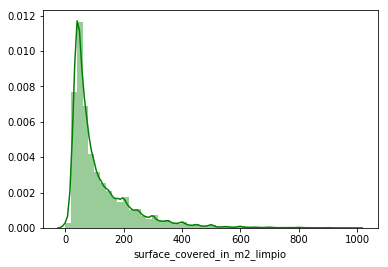

In [8]:
# sns.distplot(data.surface_covered_in_m2, kde=True, color = "blue")
# sns.distplot(data.surface_total_in_m2, kde=True, color = "red")
mask1 = data.surface_covered_in_m2_limpio < 1000
menor_mil = data.loc[mask1,:]
sns.distplot(menor_mil.surface_covered_in_m2_limpio, kde=True, color = "green")

In [22]:
# outliers
q1 = data["surface_covered_in_m2"].quantile(0.25)
print(q1)
q2 = data["surface_covered_in_m2"].quantile(0.5)
print(q2)
q3 = data["surface_covered_in_m2"].quantile(0.75)
print(q3)


iqr = (q3 - q1) * 1.5

up_threshold = q3 + iqr
low_threshold = q1 - iqr

print(up_threshold)
print(low_threshold)


outlier_sup = data["surface_covered_in_m2"] > up_threshold
outlier_inf = data["surface_covered_in_m2"] < low_threshold
outlier_mask = np.logical_or(outlier_sup, outlier_inf)
# not_outliers = np.logical_not(outlier_mask)

outliers = data["surface_covered_in_m2"][outlier_mask]
outliers.count()

45.0
75.0
150.0
307.5
-112.5


6687

In [9]:
# máscara sin outliers
mask_sin_outliers = data.surface_covered_in_m2_limpio < 307.5
data_m2 = data.loc[mask_sin_outliers,:]
z = data_m2.groupby(["state_name", "place_name"])["surface_covered_in_m2_limpio"].count().sort_values(ascending=False)
valores = pd.DataFrame(z)
valores
print(data_m2.shape)
data_m2.property_type.value_counts()

(94632, 29)


apartment    59314
house        28051
PH            4878
store         2389
Name: property_type, dtype: int64

In [10]:
# inmuebles con menos de 25 mt2
menor_25 = data_m2.surface_covered_in_m2_limpio < 25
mask1 = data_m2.loc[menor_25,"surface_covered_in_m2_limpio"]
print(mask1.count())
data_menor_25 = data_m2.loc[menor_25,:]
data_menor_25.shape

2554


(2554, 29)

In [11]:
# buscamos en description el dato de mt2 para corroborar/corregir que el dato sea correcto
import re

patron = "(\d{0,4}\,?\.?\d{0,4})? ?(m2|mc|metros|mts|mt2)"
regex = re.compile(patron, flags = re.IGNORECASE)

a = data_menor_25.description.apply(lambda x: regex.search(x))
a.value_counts
mt2_match = a.apply(lambda x: x if x is None else x.group(1))
data["menores_25"]= mt2_match

173           
277        305
281         23
302           
349       None
          ... 
120113    None
120591      20
121121    None
121130      40
121135    None
Name: description, Length: 2554, dtype: object

In [13]:
# actualizamos los datos resultantes en la columna limpia
m = data.menores_25.notnull()
data.loc[m, "surface_covered_in_m2_limpio"] = data.loc[m, "menores_25"]
data["surface_covered_in_m2_limpio"] = data["surface_covered_in_m2_limpio"].astype(float)

In [14]:
data.loc[277, ["surface_covered_in_m2_limpio", "menores_25"]]

surface_covered_in_m2_limpio    305
menores_25                      305
Name: 277, dtype: object

In [31]:
data["surface_covered_in_m2_limpio"].value_counts()

40.0      2745
50.0      2200
45.0      2145
60.0      1893
100.0     1867
          ... 
2935.0       1
3330.0       1
4838.0       1
591.0        1
561.0        1
Name: surface_covered_in_m2_limpio, Length: 1009, dtype: int64

In [40]:
# registros a eliminar: inmuebles menores de 10 mt2
menor_10 = data.surface_covered_in_m2_limpio < 10
mask10 = data.loc[menor_10,"surface_covered_in_m2_limpio"]
print(mask10.count())
data_menor_10 = data.loc[menor_10,:]
data_menor_10

593


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,surface_total_in_m2_limpio,surface_covered_in_m2_limpio,diferencia_mt2,menores_25
349,349,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.430822,-64.1902624",-31.430822,-64.190262,1236000.0,USD,21808602.00,1236000.00,NaN,1.0,NaN,1.236000e+06,NaN,1.0,NaN,http://www.properati.com.ar/15e6o_venta_departamento_cordoba_garcia-sagues-inmobiliaria,Departamento en Venta de 1 dorm. en Cordoba,NUEVA CORDOBA - CIUDAD UNIVERSITARIA -,https://thumbs4.properati.com/6/--OsjGZYFJohU360wcabU6iXcF8=/trim/198x0/smart/filters:strip_icc()/www.gva-online.com.ar/613/Fotos/fi040400.613,NaN,1.0,NaN,None
840,840,sell,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,"-34.586109,-58.3875047",-34.586109,-58.387505,179500.0,USD,3167187.75,179500.00,40.0,4.0,4487.500000,4.487500e+04,NaN,2.0,2000.0,http://www.properati.com.ar/15g70_venta_departamento_recoleta_del-libertador-av-_1100_balcon_lavadero_luminoso_amoblado_aire-acondicionado_subte-linea-h_macord-propiedades,"Venta de Departamento 2 AMBIENTES en Recoleta, Capital FederalA unas cuadras de Buenos Aires Design, Plaza Francia, Cementerio de Recoleta. Importante zona gastronomica y de bares modernos. Facultad de derecho. Retiro. Sheraton. 5 minutos de microcentro. lineas de trenes y lineas de subterraneos, numerosas lineas de bus. y metrobus.. Se encuentra todo en perfectas condiciones, super Luminoso, muy ventilado. Aire acondicionado en cada ambiente Pisos nuevos. Baño y cocina amoblada. lavadero y living con balcon. Apto profesional Edificio con seguridad.El departamento esta todo nuevo .Ideal inversionista.El departamentos se encuentra alquilado desde marzo 2017 hasta marzo 2019 con una muy buena renta e inquilino de primera linea. Contrato altamente controlado y chequeado. - - MACORD PROPIEDADES",DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/1/kvlSzBUJyBGkYth5VzEi6K4yG_o=/trim/198x0/smart/filters:strip_icc()/xintelweb.com/upload/mcr12_2.jpg%3F1501539460,40.0,4.0,36.0,None
920,920,sell,house,Esteban Echeverría,|Argentina|Bs.As. G.B.A. Zona Sur|Esteban Echeverría|,Argentina,Bs.As. G.B.A. Zona Sur,3434003.0,"-34.8487278,-58.4823123",-34.848728,-58.482312,65000.0,USD,1146892.50,65000.00,NaN,4.0,NaN,1.625000e+04,NaN,NaN,NaN,http://www.properati.com.ar/15gkf_venta_casa_esteban-echeverria_baulera_lavadero_piscina_luminoso_garage_estudio-inmobiliario-juan-xxiii,"OPORTUNIDAD !!! VENDO CHALET DE 2 PLANTAS EN EL JAGUEL AL FRENTE !!! Comodo - Luminoso Ventilado - CUADRA NO ASFALTADA - todos los servicios - lote de 10 x 20 - Cochera - No es Apto Crédito Bancario. *CONSTA DE : PB :Garage cubierto , living - comedor amplio con pisos de ceramica , cocina sin bajo mesada , lavadero con pileta para lavar y para conexion de lavarropas . PA : Dos dormitorios al frente , al lado del dormitorio principal hay una baulera , baño completo con ducha , una escalera de cemento por donde se sale al garage , pisos de ceramica . *UBICACION : Toledo al 2575 entre Evita y Pizzurno el Jaguel Monte Grande , a 5 minutos de Canning , varias lineas de colectivos , 501 , y a 3 cuadras el 394 , zona comunicada y tranquila , 1 cuadra de asfalto , acepta auto en parte de pago , o una vivienda en la zona del jaguel . *VALOR : U$S 65000 CONSULTENOS !!!Estudio Inmobiliario Juan Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",CHALET DE 2 PLANTAS EN EL JAGUEL !!!,https://thumbs4.properati.com/2/DO0MahhHg-jIJ9xOLnmHUt4mRbE=/trim/198x0/smart/filters:strip_icc()/juan23inmobiliaria.com/photos/31-FOTO%202.jpeg,NaN,4.0,NaN,None
1775,1775,sell,apartment,Vicente López,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente López|

In [47]:
data[["surface_covered_in_m2_limpio"]].describe()

,surface_covered_in_m2_limpio
count,101313.000000
mean,131.705886
std,379.529666
min,0.000000
25%,46.000000
50%,75.000000
75%,150.000000
max,35000.000000


In [46]:
j = data["surface_covered_in_m2_limpio"] == 420158
data.loc[13157,"surface_covered_in_m2_limpio"] = 20

In [50]:
v = (data["surface_covered_in_m2_limpio"] < 1000)
data.loc[v,"surface_covered_in_m2_limpio"].count()

100869

In [53]:
data.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,surface_total_in_m2_limpio,surface_covered_in_m2_limpio
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inmobiliaria-fedele,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIKufMJMwHtquzhk=/trim/198x0/smart/filters:strip_icc()/inmobiliariafedele.com/photos/CARHUE%202278-IMG_3400.JPG,55.0,40.0
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_departamentos_la-plata_balcon_lavadero_toilette_garage_estrenar_antonini-propiedades_dcp,"Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000 Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv45KAKirGL3JM8=/trim/198x0/smart/filters:strip_icc()/antoninipropiedades.com/photos/401-1-7%20y%2037%2010A%201.jpg,NaN,NaN
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_departamentos_mataderos_lavadero_placard_inmobiliaria-fedele,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_Ejwfu6QpW4cH0=/trim/198x0/smart/filters:strip_icc()/inmobiliariafedele.com/photos/GUAMINI%201171-IMG_3403.JPG,55.0,55.0
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso.Reciclado a nuevo. ""Muy buen estado"" Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/198x0/smart/filters:strip_icc()/ggoffredo.com/photos/GG0040-1563480102.jpg,NaN,NaN
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_departamentos_centro_cristina-pavone-nego

In [52]:
del data["diferencia_mt2"]
del data["menores_25"]

In [56]:
# data final se llama dataN
# faltaría eliminar registros que serían: data["surface_covered_in_m2_limpio"] < 10
# tiene dos columnas nuevas: "surface_total_in_m2_limpio" y "surface_covered_in_m2_limpio"
dataN

(121220, 28)